In [1]:
import numpy as np
import pandas as pd
#from keras.utils import np_utils
# 匯入資料
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
print('train data= ',len(x_train_image))
print('test data=', len(x_test_image))

11490434/11490434 [==============================] - 0s 0us/step
train data=  60000
test data= 10000


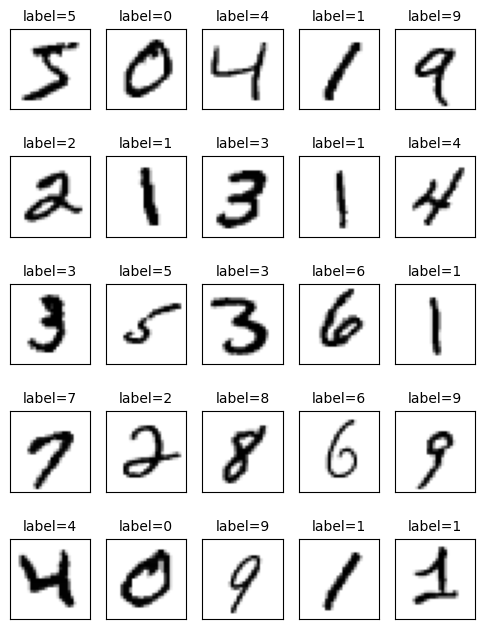

In [4]:
import matplotlib.pyplot as plt

# 建立函數要來畫多圖的
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  # 設定顯示圖形的大小
  fig= plt.gcf()
  fig.set_size_inches(6,8)
  # 最多25張
  if num>25:num=25
  # 一張一張畫
  for i in range(0,num):
    # 建立子圖形5*5(五行五列)
    ax=plt.subplot(5,5,i+1)
    # 畫出子圖形
    ax.imshow(images[idx],cmap='binary')
    # 標題和label
    title="label=" +str(labels[idx])
    # 如果有傳入預測結果也顯示
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])
    # 設定子圖形的標題大小
    ax.set_title(title,fontsize=10)
    # 設定不顯示刻度
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()
plot_images_labels_prediction(x_train_image,y_train_label,[],0,25)

In [5]:
# 影像資料--------------------------------------
# 代表 train image 總共有6萬張，每一張是28*28的圖片
# label 也有6萬個
# 所以要把二維的圖片矩陣先轉換成一維
# 這裡的784是因為 28*28
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')


# 由於是圖片最大的是255，所以全部除以255，使其變成0-1的數值
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [28]:
from sklearn.ensemble import BaggingClassifier

import time

start_time = time.time()
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(x_Train_normalize, y_train_label)
end_time = time.time()
process_time = end_time - start_time
print(f"Training time: {process_time:.1f} seconds")


Training time: 146.9 seconds


Overall Acuracy:0.944


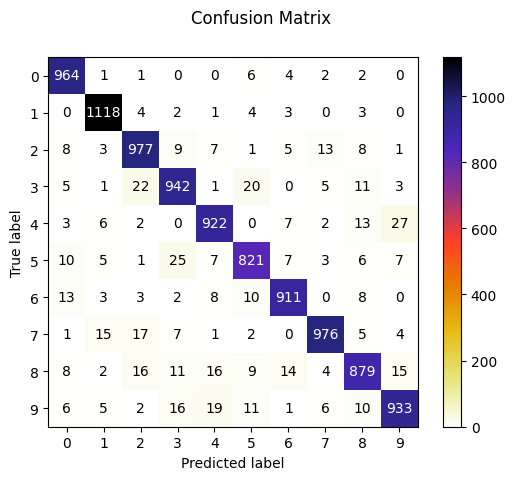

In [29]:
# Predict the value of the digit on the test subset
predicted = clf.predict(x_Test_normalize)
# Display the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, predicted,cmap='CMRmap_r')
accu = metrics.accuracy_score(y_test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")
print('Overall Acuracy:{:.3}'.format(accu))


Overall Acuracy:0.973


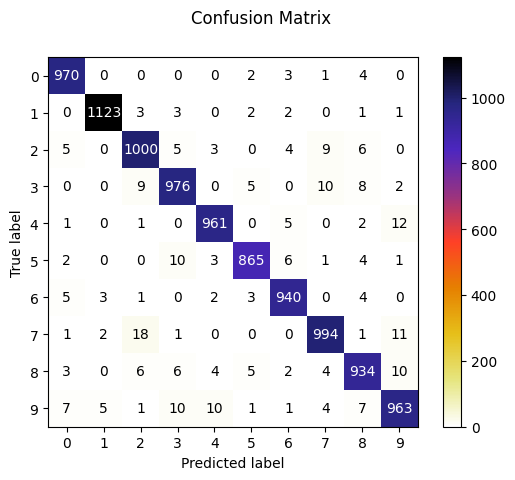

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time

start_time = time.time()
model = RandomForestClassifier(n_estimators=500)

# training data has 60000 samples, so the training process may take few minutes.

model.fit(x_Train_normalize, y_train_label)
end_time = time.time()
process_time = end_time - start_time
print(f"Training time: {process_time:.1f} seconds")

# Predict the value of the digit on the test subset
predicted = model.predict(x_Test_normalize)
# Display the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, predicted,cmap='CMRmap_r')
accu = metrics.accuracy_score(y_test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")
print('Overall Acuracy:{:.3}'.format(accu))




In [10]:
import xgboost as xgb
import time
train = xgb.DMatrix(x_Train_normalize, label=y_train_label)
test = xgb.DMatrix(x_Test_normalize,label=y_test_label)
# parameter setting for xgboost
para = {'max_depth':15,'eta':0.5, 'objective':'multi:softmax','num_class':10}
epochs = 50


In [11]:





# training data has 60000 samples, so the training process may take few minutes.
start_time = time.time()

#model.fit(x_Train_normalize, y_train_label)
model = xgb.train(para,train,epochs)

end_time = time.time()
process_time = end_time - start_time
print(f"Training time: {process_time:.1f} seconds")



Training time: 373.1 seconds


TypeError: ignored

Overall Acuracy:0.975


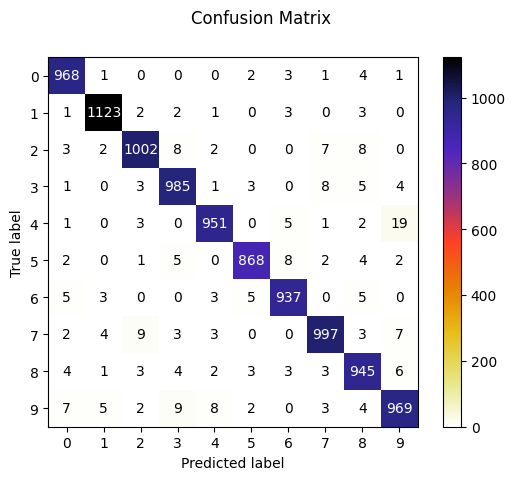

In [12]:
# Predict the value of the digit on the test subset
predicted = model.predict(test)
# Display the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, predicted,cmap='CMRmap_r')
accu = metrics.accuracy_score(y_test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")
print('Overall Acuracy:{:.3}'.format(accu))

In [13]:
import lightgbm as lgb

d_train = lgb.Dataset(x_Train_normalize, label=y_train_label)

In [14]:
para = {'max_depth':10,
        'learning_rate':0.08,
        'objective':'multiclass',
        'num_class':10,
        'boosting_type':'gbdt',  # try dart also
        #'metric':['auc','binary_logloss'],
        'num_leaves':50}
epochs = 30


In [15]:
# training data has 60000 samples, so the training process may take few minutes.
start_time = time.time()

model = lgb.train(para,d_train,epochs)

end_time = time.time()
process_time = end_time - start_time
print(f"Training time: {process_time:.1f} seconds")




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.798655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 109606
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 629
[LightGBM] [Info] Start training from score -2.315501
[LightGBM] [Info] Start training from score -2.185988
[LightGBM] [Info] Start training from score -2.309610
[LightGBM] [Info] Start training from score -2.280987
[LightGBM] [Info] Start training from score -2.329271
[LightGBM] [Info] Start training from score -2.404064
[LightGBM] [Info] Start training from score -2.316346
[LightGBM] [Info] Start training from score -2.259366
[LightGBM] [Info] Start training from score -2.327732
[LightGBM] [Info] Start training from score -2.311121
Training time: 91.8 seconds


In [22]:
# Predict the value of the digit on the test subset
predicted = model.predict(x_Test_normalize)
best_preds = [np.argmax(line) for line in predicted]


Overall Acuracy:0.96


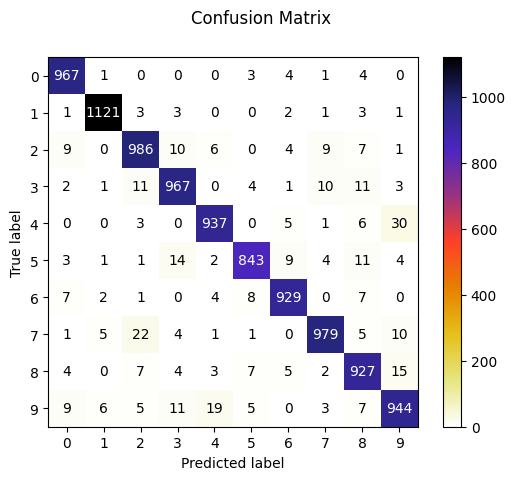

In [24]:


# Display the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, best_preds ,cmap='CMRmap_r')
accu = metrics.accuracy_score(y_test_label, best_preds)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")
print('Overall Acuracy:{:.3}'.format(accu))
